In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

AttributeError: partially initialized module 'pandas' has no attribute 'core' (most likely due to a circular import)

count    4.000000
mean     2.047500
std      0.645207
min      1.090000
25%      1.960000
50%      2.310000
75%      2.397500
max      2.480000
Name: Vacancy Formation (eV), dtype: float64

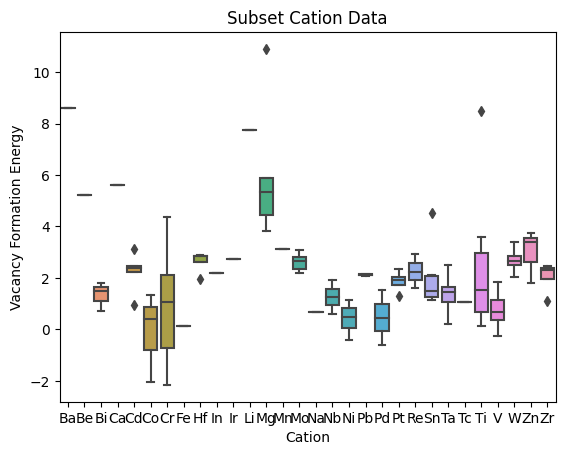

In [24]:
#read data
df = pd.read_csv(r"C:\Users\18729\Downloads\Search on Binary Chalcogenides - Dataset.csv")
df2 = pd.read_csv(r"C:\Users\18729\Downloads\Dataset2.csv") #including extra data

#assign target features
X = df2["Cation"].values
y = df2["Vacancy Formation (eV)"].values

#plot
plot = sns.boxplot(x=X,y=y)
plt.title('Subset Cation Data')
plt.xlabel('Cation')
plt.ylabel('Vacancy Formation Energy')

#mean/median/std/percentiles/min/max for cations
df2["Cation"].describe()

df2[df2["Cation"]=="Zr"]["Vacancy Formation (eV)"].describe()

Text(0, 0.5, 'Vacancy Formation Energy')

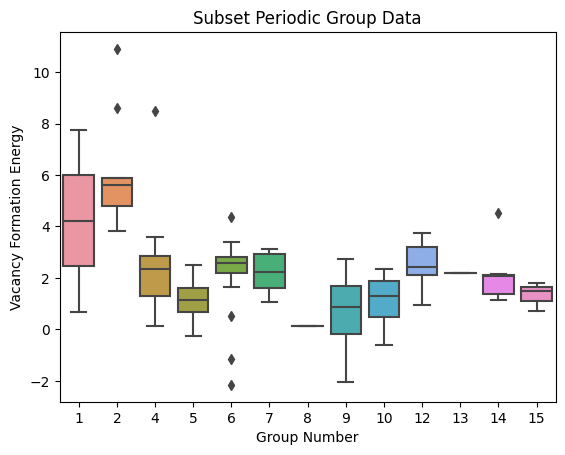

In [25]:
#group numbers
from pymatgen.core.periodic_table import Element, ElementBase

#adding group nums
df2["Group #"] = ''

for i in range(0,len(df2.index)):
    element = Element(df2.Cation[i])
    group_num = element.group
    df2.at[i, 'Group #'] = group_num
X = df2["Group #"].values

#plot
plot = sns.boxplot(x=X,y=y)
plt.title('Subset Periodic Group Data')
plt.xlabel('Group Number')
plt.ylabel('Vacancy Formation Energy')

#mean/median/std/percentiles/max/min...not working (fix)
#df2[df2["Group #"]=='12']["Vacancy Formation (eV)"].describe()


       Vacancy Formation (eV)  Vacancy Formation (eV)  Vacancy Formation (eV)
count               39.000000               39.000000               30.000000
mean                 2.264769                2.407795                1.935067
std                  1.803056                2.549561                1.043552
min                 -1.150000               -2.160000                0.140000
25%                  1.355000                1.100000                1.167500
50%                  1.940000                2.210000                2.100000
75%                  2.805000                3.135000                2.572500
max                  8.610000               10.900000                4.380000


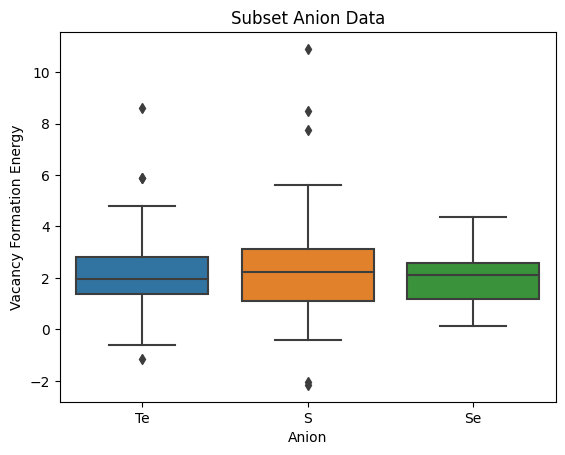

In [26]:
#subset by anion

#assign target features
X = df2["Anion (2-)"].values
y = df2["Vacancy Formation (eV)"].values

#plot
plot = sns.boxplot(x=X,y=y)
plt.title('Subset Anion Data')
plt.xlabel('Anion')
plt.ylabel('Vacancy Formation Energy')

#mean/median/std/percentiles/max/min based on anions
anion_stats = df2["Anion (2-)"].describe()
s_stats = df2[df2["Anion (2-)"]=='S']["Vacancy Formation (eV)"].describe()
se_stats = df2[df2["Anion (2-)"]=='Se']["Vacancy Formation (eV)"].describe()
te_stats = df2[df2["Anion (2-)"]=='Te']["Vacancy Formation (eV)"].describe()

anion_related_stats = pd.concat([te_stats,s_stats,se_stats],axis=1)
print(anion_related_stats)

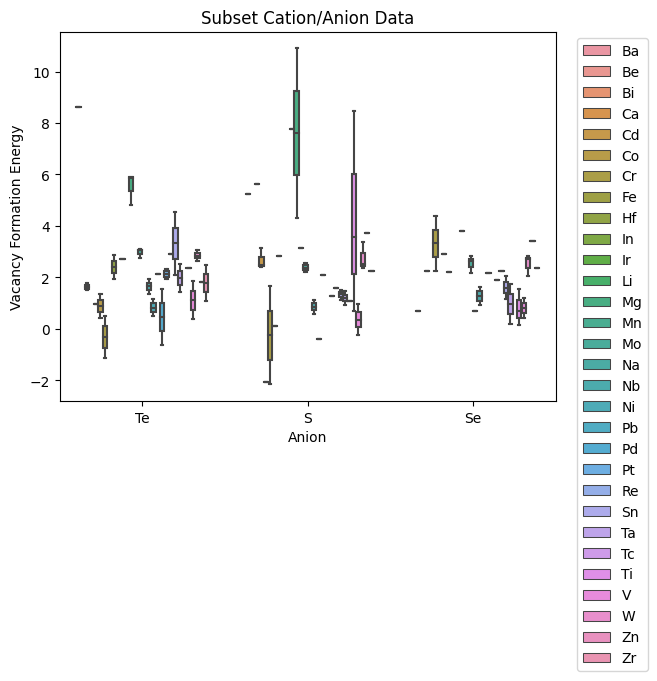

In [27]:
#subset by cation/anion...use different type of graph?
plot = sns.boxplot(x=X,y=y,hue=df2["Cation"])
plt.title('Subset Cation/Anion Data')
plt.xlabel('Anion')
plt.ylabel('Vacancy Formation Energy')
plt.legend(bbox_to_anchor=(1.2,1),loc='upper right')

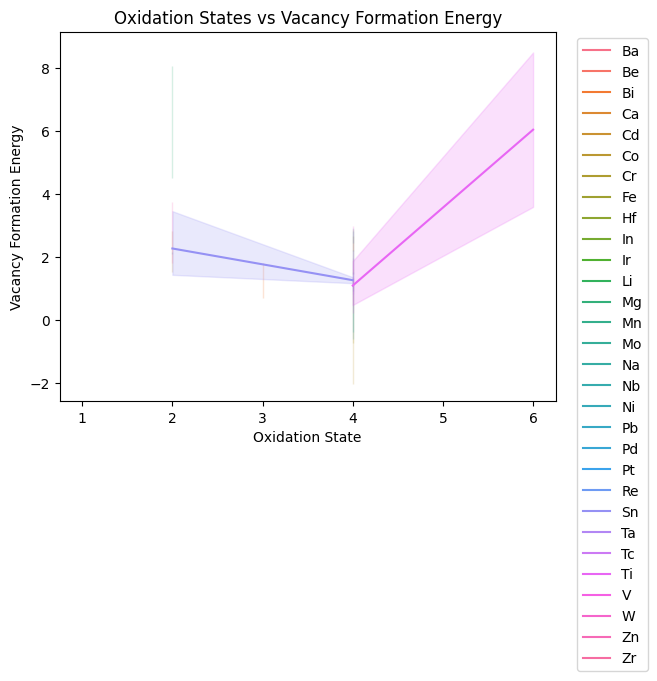

In [28]:
#f(OS)=FE (different lines per cation)
X=df2["Cation OS"].values

plot = sns.lineplot(x=X,y=y,hue=df2["Cation"])
plt.title('Oxidation States vs Vacancy Formation Energy')
plt.xlabel('Oxidation State')
plt.ylabel('Vacancy Formation Energy')
plt.legend(bbox_to_anchor=(1.2,1),loc='upper right')

In [29]:
#overall stats
df2.describe()

,Cation OS,Vacancy Formation (eV)
count,108.000000,108.000000
mean,3.472222,2.224833
std,0.980733,1.947959
min,1.000000,-2.160000
25%,2.000000,1.152500
50%,4.000000,2.090000
75%,4.000000,2.812500
max,6.000000,10.900000


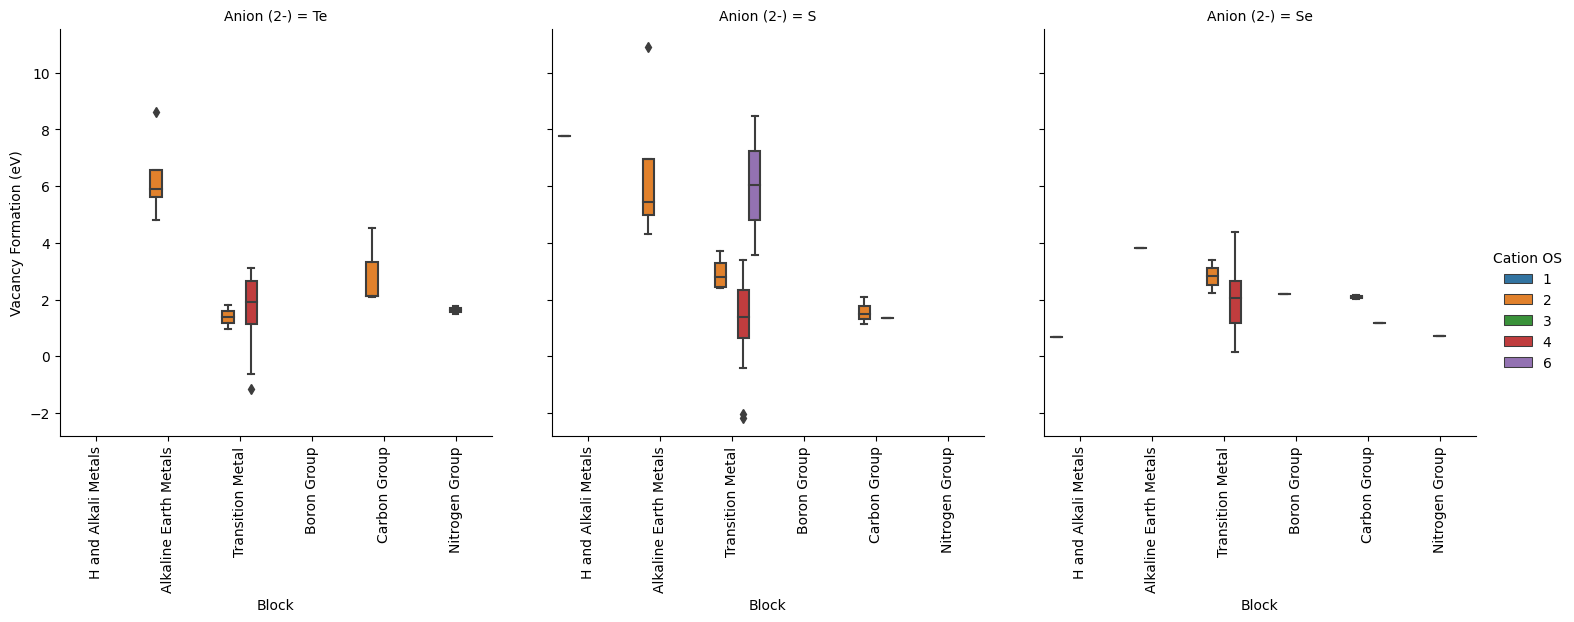

In [33]:
labels = {1: "H and Alkali Metals", 
          2: "Alkaline Earth Metals",
          3: "Transition Metal",
          4: "Transition Metal",
          5: "Transition Metal",
          6: "Transition Metal",
          7: "Transition Metal",
          8: "Transition Metal",
          9: "Transition Metal",
          10: "Transition Metal",
          11: "Transition Metal",
          12: "Transition Metal",
          13: "Boron Group",
          14: "Carbon Group",
          15: "Nitrogen Group",
          16: "Chalcogens",
          17: "Halogens",
          18: "Noble Gases"
}

df2["Block"]=df2["Group #"].apply(lambda x: labels[x])

#creating dataframes based on anion
#dfs = df2[df2["Anion (2-)"] == 'S']
#dfse = df2[df2["Anion (2-)"]=='Se']
#dfte = df2[df2["Anion (2-)"] == 'Te']

plot = sns.catplot(x="Block", y="Vacancy Formation (eV)",hue="Cation OS",col="Anion (2-)",data=df2,kind="box",order=["H and Alkali Metals", "Alkaline Earth Metals", "Transition Metal", "Boron Group", "Carbon Group", "Nitrogen Group"])
plot.set_xticklabels(rotation=90)

from mendeleev import element
df2["Atomic Number"]=''

#adding atomic numbers
for i in range(0,len(df2.index)):
    df2.at[i, 'Atomic Number'] = element(df2.Cation[i]).atomic_number

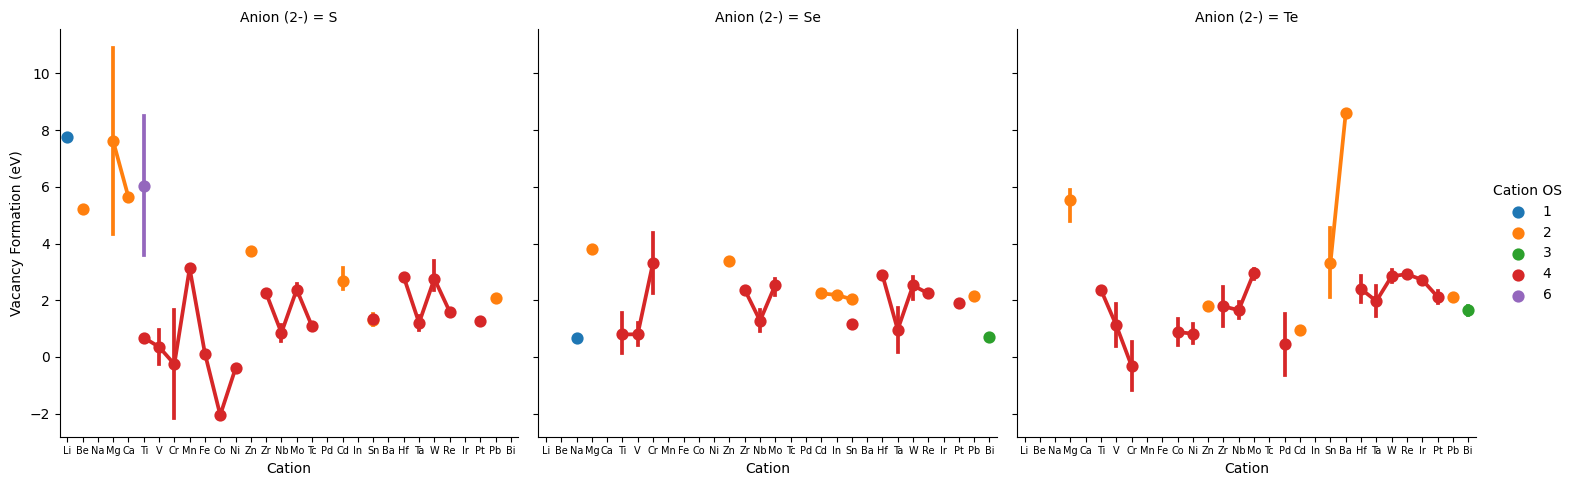

In [53]:
df2 = df2.sort_values(by="Atomic Number")
plot = sns.catplot(x="Cation", y="Vacancy Formation (eV)",hue="Cation OS",col="Anion (2-)",data=df2,kind="point",aspect=1)
plot.set_xticklabels(fontsize=7)